# **1. Perkenalan Dataset**


Pada proyek ini, saya menggunakan **Online Retail Dataset** sebagai data yang akan dianalisis. Dataset ini diperoleh dari sumber publik dan memenuhi seluruh kriteria yang disyaratkan untuk tahap clustering.

### 1. Sumber Dataset
Dataset diambil dari situs **UCI Machine Learning Repository**, tepatnya dari halaman:  
[Online Retail Dataset - UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/online+retail)

Dataset ini juga tersedia dalam versi yang lebih sering digunakan di platform lain seperti **Kaggle**, yang memiliki format `.xlsx` dan berisi transaksi penjualan dari sebuah perusahaan retail asal Inggris selama periode Desember 2010 hingga Desember 2011.

---

### 2. Ketentuan Dataset

Berikut adalah ketentuan yang dipenuhi oleh dataset ini:

- **Tanpa Label**:  
  Dataset ini tidak memiliki kolom target atau label yang mendefinisikan kategori secara eksplisit. Oleh karena itu, dataset ini cocok untuk digunakan dalam metode *unsupervised learning*, khususnya **clustering**.

- **Jumlah Baris**:  
  Dataset ini memiliki lebih dari **500.000 baris**, sehingga sudah sangat mencukupi syarat minimal 1.000 baris data.

- **Tipe Data**:  
  Dataset ini mengandung kombinasi data **numerikal** dan **kategorikal**, antara lain:
  
  - **Numerikal**:  
    - `Quantity`: Jumlah produk yang dibeli.  
    - `UnitPrice`: Harga satuan produk.  
    - `InvoiceNo`: Dapat diubah menjadi numerik jika diperlukan (atau digunakan sebagai ID).  
  
  - **Kategorikal**:  
    - `Country`: Negara tempat transaksi dilakukan.  
    - `Description`: Nama atau deskripsi produk.  
    - `CustomerID`: ID pelanggan (opsional, bisa dipakai atau dibuang tergantung kebutuhan preprocessing).  
    - `InvoiceNo`: ID transaksi (tidak digunakan sebagai fitur pelatihan).

---

### 3. Pembatasan Dataset

Dataset **Online Retail** ini **belum digunakan dalam latihan clustering** pada modul pembelajaran, sehingga memenuhi syarat untuk digunakan dalam submission ini. Dataset ini bersifat open dan belum mengandung label, serta beragam secara geografis dan produk, sehingga sangat potensial untuk dianalisis lebih lanjut dalam tahap clustering dan klasifikasi.

---

Dengan memenuhi seluruh ketentuan di atas, dataset ini sangat layak untuk digunakan sebagai bahan eksperimen clustering dan klasifikasi dalam proyek submission ini.


# **2. Import Library**

Pada tahap ini, saya mengimpor berbagai library Python yang diperlukan untuk menjalankan proyek clustering. Library yang digunakan memiliki fungsi masing-masing sesuai dengan kebutuhan preprocessing, analisis, dan visualisasi data.

### 🔹 1. Manipulasi Data
- **pandas**: Digunakan untuk membaca dataset, manipulasi data tabular, dan transformasi data frame.
- **numpy**: Digunakan untuk komputasi numerik dan operasi array.

### 🔹 2. Visualisasi Data
- **matplotlib.pyplot**: Digunakan untuk membuat visualisasi data dasar seperti histogram, scatter plot, dan pie chart.
- **seaborn**: Digunakan untuk visualisasi statistik yang lebih kompleks dan menarik seperti heatmap dan boxplot.

### 🔹 3. Preprocessing Data
- **StandardScaler**: Digunakan untuk menstandarisasi fitur numerik ke distribusi standar (mean = 0, std = 1).
- **LabelEncoder**: Digunakan untuk mengubah data kategorikal menjadi bentuk numerik.
- **SimpleImputer**: Digunakan untuk mengatasi missing value pada dataset dengan strategi tertentu (mean, median, modus, dll).

### 🔹 4. Clustering & Evaluasi
- **KMeans**: Algoritma clustering yang digunakan untuk membagi data ke dalam beberapa kelompok (cluster).
- **silhouette_score**: Metode evaluasi untuk mengukur seberapa baik data telah dikelompokkan.
- **PCA (Principal Component Analysis)**: Digunakan untuk mereduksi dimensi data agar dapat divisualisasikan dalam bentuk 2D atau 3D.

### 🔹 5. Miscellaneous
- **warnings**: Digunakan untuk menghilangkan peringatan yang tidak penting agar notebook lebih bersih saat dijalankan.

---

Dengan library di atas, saya dapat melakukan eksplorasi, preprocessing, clustering, hingga evaluasi dan visualisasi hasil dengan baik.


In [1]:
# Manipulasi Data
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Misc
import warnings
warnings.filterwarnings('ignore')


# **3. Memuat Dataset**

Pada tahap ini, saya memuat dataset *Online Retail* ke dalam notebook menggunakan pustaka `pandas`. Dataset ini berformat `.xlsx`, sehingga saya menggunakan fungsi `read_excel()` untuk membacanya.

Setelah dataset berhasil dimuat, saya menampilkan beberapa baris awal dari data menggunakan fungsi `head()` untuk memahami struktur data serta memastikan bahwa data telah berhasil terbaca dan siap dianalisis lebih lanjut.


In [12]:
# Memuat dataset Online Retail
file_path = 'Online-Retail.xlsx' 
df = pd.read_excel(file_path)

# Menampilkan 5 baris pertama untuk memastikan data berhasil dimuat
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Dari tabel di atas, dapat dijelaskan beberapa kolom penting pada dataset:

- **InvoiceNo**: Nomor faktur untuk setiap transaksi. Formatnya berupa angka yang mewakili transaksi tertentu.
- **StockCode**: Kode unik untuk setiap produk.
- **Description**: Deskripsi atau nama produk yang dijual.
- **Quantity**: Jumlah unit produk yang dibeli dalam transaksi tersebut.
- **InvoiceDate**: Waktu dan tanggal ketika transaksi dilakukan.
- **UnitPrice**: Harga per unit produk dalam mata uang pound sterling (£).
- **CustomerID**: ID unik untuk setiap pelanggan. Beberapa baris dalam dataset mungkin memiliki nilai kosong untuk kolom ini.
- **Country**: Negara asal pelanggan yang melakukan transaksi.

Tampilan ini menunjukkan bahwa dataset memuat data transaksi penjualan produk secara detail, yang dapat dimanfaatkan untuk analisis lebih lanjut seperti segmentasi pelanggan atau pola pembelian berdasarkan perilaku.

# **4. Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) merupakan tahap penting dalam memahami struktur dan karakteristik data. Tujuan dari EDA ini meliputi:

1. **Memahami Struktur Data**
   - Mengetahui jumlah baris dan kolom dataset.
   - Mengidentifikasi tipe data dari setiap kolom, baik numerikal maupun kategorikal.

2. **Menangani Data yang Hilang (Missing Values)**
   - Mengidentifikasi kolom-kolom yang memiliki nilai hilang.
   - Menentukan penanganan yang tepat, seperti menghapus atau mengisi nilai yang hilang.

3. **Analisis Distribusi dan Korelasi**
   - Meninjau distribusi variabel numerik menggunakan statistik deskriptif dan visualisasi.
   - Menganalisis hubungan antar variabel dengan matriks korelasi.

4. **Visualisasi Data**
   - Membuat grafik distribusi variabel numerikal (histogram, boxplot).
   - Menampilkan diagram batang untuk variabel kategorikal.
   - Menggunakan heatmap atau pairplot untuk korelasi antar variabel.


Ukuran dataset (baris, kolom): (541909, 8)

Tipe data tiap kolom:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

Jumlah missing values pada setiap kolom:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Statistik deskriptif untuk variabel numerik:
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00  

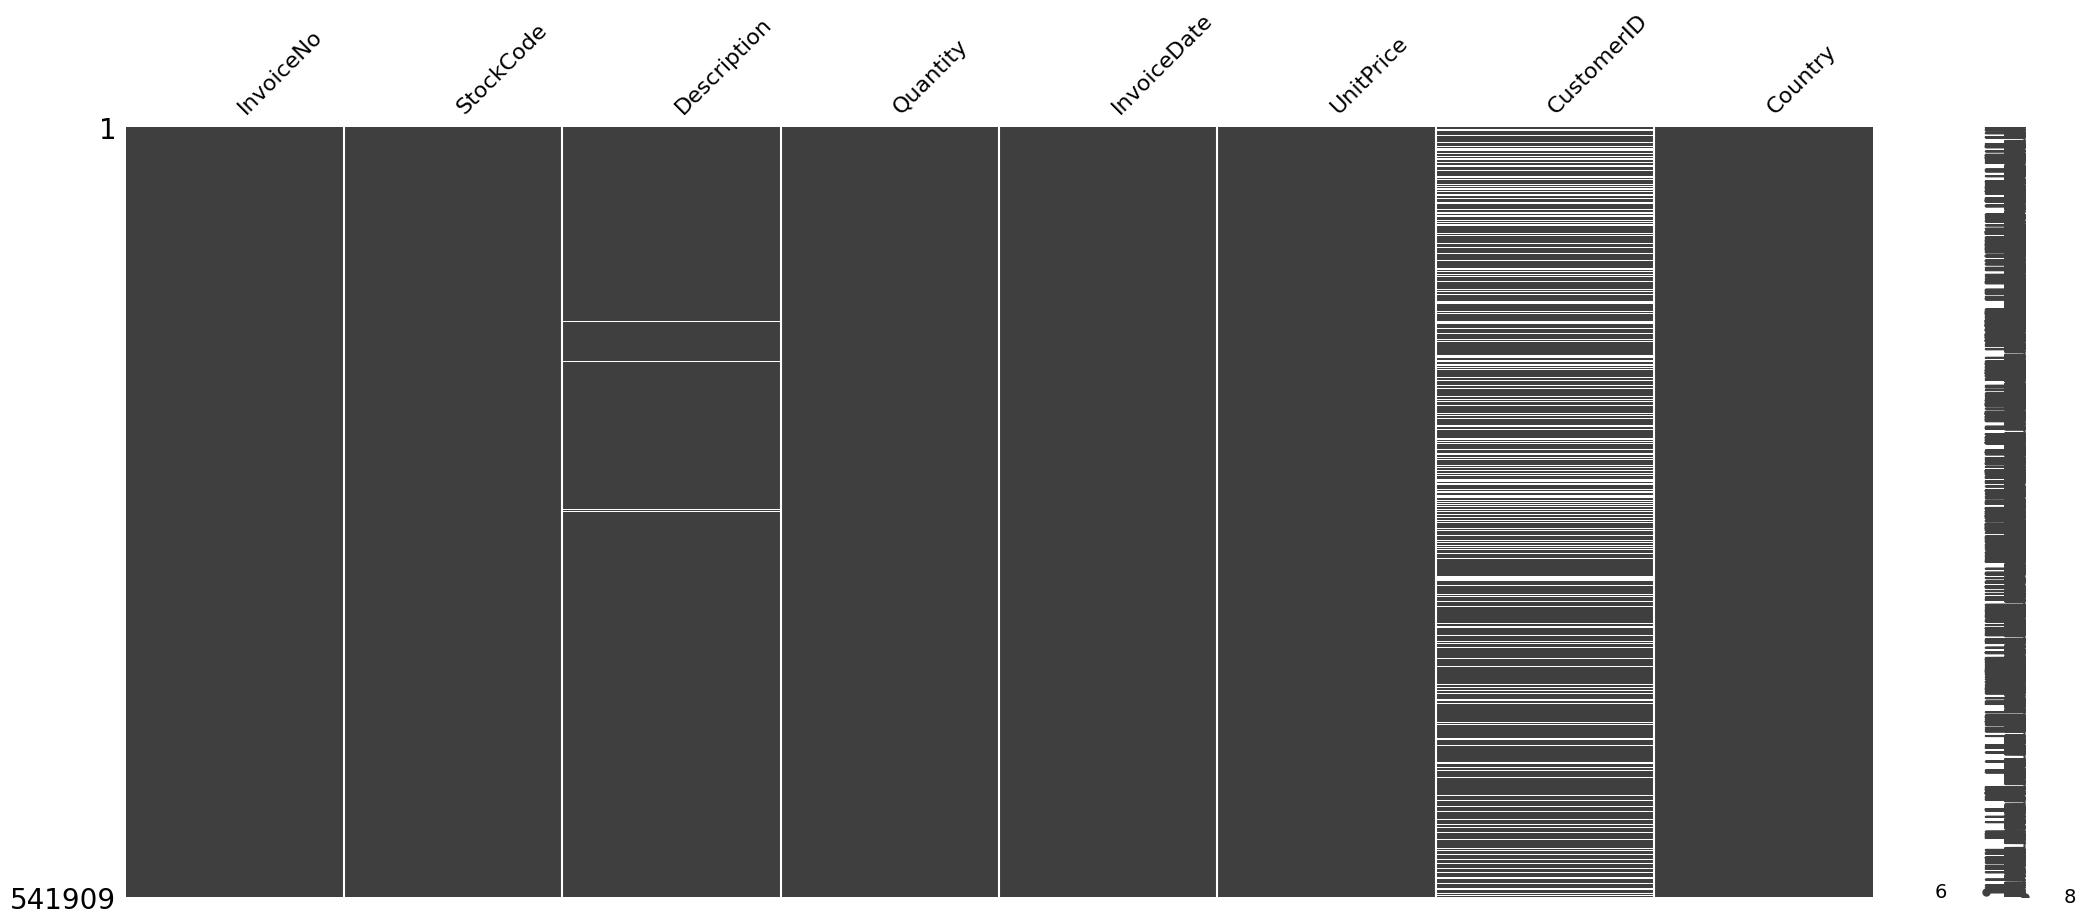

In [13]:
# 1. Memahami Struktur Data
print("Ukuran dataset (baris, kolom):", df.shape)
print("\nTipe data tiap kolom:")
print(df.dtypes)

# 2. Menangani Data yang Hilang
print("\nJumlah missing values pada setiap kolom:")
print(df.isnull().sum())

# Visualisasi missing values
import missingno as msno
msno.matrix(df)

# 3. Statistik Deskriptif Variabel Numerik
print("\nStatistik deskriptif untuk variabel numerik:")
print(df.describe())


### 📈 Hasil EDA Awal

Berdasarkan hasil eksplorasi awal terhadap dataset **Online Retail**, berikut adalah temuan penting yang berhasil diidentifikasi:

---

#### 🔹 Ukuran Dataset
Dataset memiliki bentuk:
```
(541909, 8)
```
Artinya terdapat **541.909 baris** (transaksi) dan **8 kolom** (fitur).

---

#### 🔹 Tipe Data Tiap Kolom
Berikut tipe data dari masing-masing kolom:
```
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
```

- Kolom seperti `InvoiceNo`, `StockCode`, `Description`, dan `Country` bertipe **objek/kategorikal**.
- `Quantity` bertipe **integer** menandakan jumlah barang yang dibeli.
- `UnitPrice` adalah **float** yang menyatakan harga per unit barang.
- `InvoiceDate` adalah tipe **datetime**, berguna untuk analisis tren waktu.
- `CustomerID` bertipe **float**, namun sebenarnya bersifat **kategorikal** karena merupakan ID unik pelanggan.

---

#### 🔹 Jumlah Missing Values
Pemeriksaan missing values menghasilkan:
```
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
```

- Kolom `CustomerID` memiliki **135.080 nilai kosong** (~25% dari total data).
- Kolom `Description` memiliki **1.454 nilai kosong** yang berisi transaksi tanpa deskripsi produk.
- Kolom lainnya **tidak memiliki missing values**.

> Penanganan nilai hilang ini akan sangat penting, khususnya jika analisis atau model memerlukan informasi pelanggan (`CustomerID`).

---

#### 🔹 Statistik Deskriptif Kolom Numerik
Contoh ringkasan statistik deskriptif:
```
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  
```

Statistik ini menunjukkan:
- **Median (`50%`)** dari kolom numerik adalah sekitar `15.152`
- **Nilai maksimum** mencapai `18.287`
- **Standar deviasi (`std`)** sebesar `1713.60`, menunjukkan variasi data yang cukup tinggi


### Visualisasi Missing Values

**Penjelasan:**

- Gambar di atas menunjukkan distribusi nilai hilang pada dataset menggunakan matriks visual.
- Setiap kolom mewakili fitur dalam dataset (`InvoiceNo`, `StockCode`, `Description`, dll.).
- Warna **gelap** (abu tua) menunjukkan data yang **ada**, sedangkan garis **terang/putih** menunjukkan data yang **hilang (missing)**.
- Kolom `CustomerID` memiliki banyak nilai yang hilang, terlihat dari banyaknya garis terang di kolom tersebut.
- Kolom `Description` juga memiliki sejumlah kecil data yang hilang.
- Kolom lain seperti `InvoiceNo`, `StockCode`, `Quantity`, `InvoiceDate`, `UnitPrice`, dan `Country` tidak memiliki missing value.

> Visualisasi seperti ini sangat membantu untuk cepat mengidentifikasi kolom mana yang perlu ditangani dalam proses data cleaning.


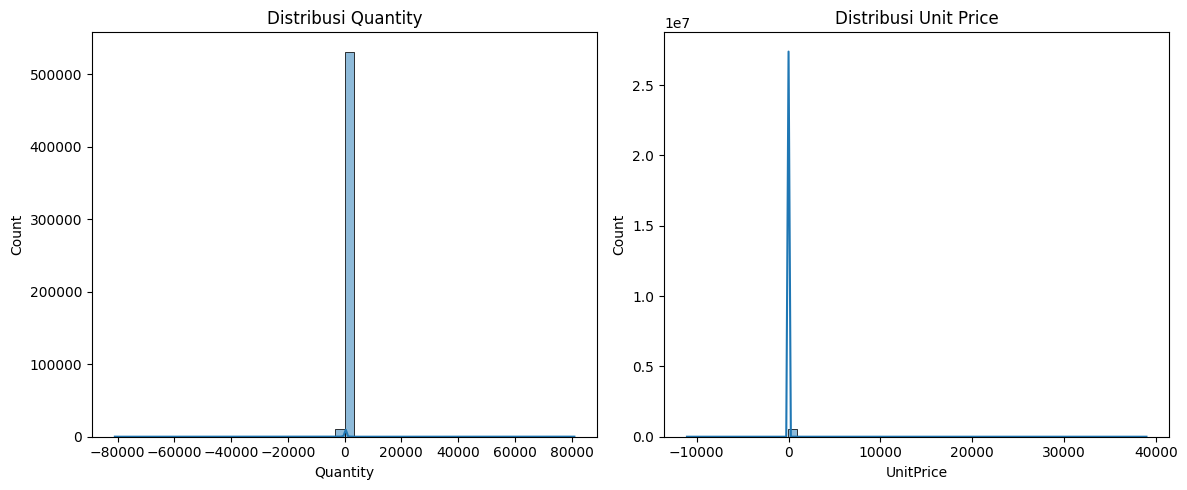

In [14]:

# Visualisasi distribusi Quantity dan UnitPrice
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribusi Quantity')

plt.subplot(1, 2, 2)
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribusi Unit Price')

plt.tight_layout()
plt.show()

### Visualisasi Distribusi Quantity dan Unit Price

**Penjelasan:**

- Gambar di atas menunjukkan histogram distribusi dua fitur numerik utama dalam dataset:
  - **Kiri**: Distribusi `Quantity`
  - **Kanan**: Distribusi `UnitPrice`

- Terlihat bahwa kedua distribusi sangat **terpusat di sekitar nilai nol**, dengan sedikit data yang memiliki nilai ekstrem (outlier) baik ke arah negatif maupun positif.

- **Quantity:**
  - Sebagian besar transaksi memiliki jumlah (quantity) positif dalam jumlah kecil.
  - Terdapat beberapa nilai negatif, kemungkinan berasal dari pengembalian barang (return item).

- **UnitPrice:**
  - Harga per unit sebagian besar juga berada di kisaran rendah (sekitar 0–10).
  - Ada beberapa nilai sangat tinggi, bahkan mendekati 40.000, yang menjadi **outlier** dan mungkin perlu dianalisis lebih lanjut untuk kevalidan data.

> Visualisasi distribusi ini penting untuk memahami skala dan persebaran data serta mendeteksi anomali atau nilai yang tidak wajar.


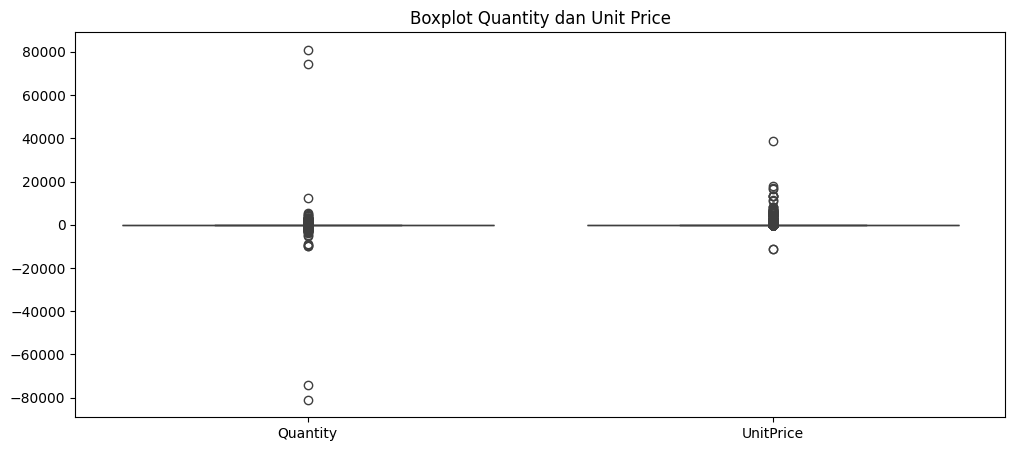

In [15]:
# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['Quantity', 'UnitPrice']])
plt.title('Boxplot Quantity dan Unit Price')
plt.show()

### Visualisasi Boxplot Quantity dan Unit Price

**Penjelasan:**

- Gambar di atas menunjukkan **boxplot** dari dua fitur numerik utama:
  - **Quantity**
  - **UnitPrice**

- **Boxplot** membantu mengidentifikasi:
  - **Distribusi data utama (IQR – Interquartile Range)**: Menunjukkan rentang di mana 50% data berada.
  - **Nilai tengah (median)**: Garis di dalam kotak yang menunjukkan median dari data.
  - **Outlier**: Ditandai dengan titik di luar whisker, menunjukkan nilai yang jauh dari distribusi utama.

- **Temuan Penting:**
  - **Quantity:**
    - Terdapat banyak outlier dengan nilai sangat tinggi (hingga >80.000) maupun sangat rendah (< -80.000).
    - Nilai negatif kemungkinan menunjukkan pengembalian barang atau kesalahan input.
  
  - **UnitPrice:**
    - Kebanyakan harga per unit berada dalam rentang kecil, menunjukkan bahwa sebagian besar transaksi adalah untuk produk dengan harga yang terjangkau.
    - Namun, ada outlier dengan harga sangat tinggi (hingga 40.000) dan juga nilai negatif yang tidak lazim, yang perlu dianalisis lebih lanjut untuk validitas data.

> Boxplot ini memperjelas adanya **outlier signifikan** yang bisa mempengaruhi analisis statistik atau model prediktif. Penanganan outlier ini sangat penting untuk memastikan kualitas model yang akan dibangun di tahap selanjutnya.


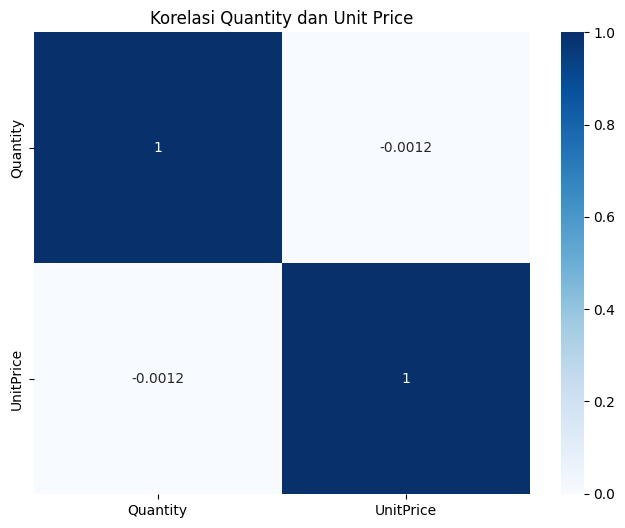

In [16]:
# Korelasi Numerikal (Pearson)
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Quantity', 'UnitPrice']].corr(), annot=True, cmap='Blues')
plt.title('Korelasi Quantity dan Unit Price')
plt.show()

### Visualisai Korelasi Quantity dan Unit Price

**Penjelasan:**

- Gambar di atas adalah **heatmap korelasi** antara dua fitur numerik:
  - **Quantity**
  - **UnitPrice**

- Korelasi dihitung menggunakan **Pearson correlation coefficient**, dengan nilai berkisar antara:
  - **-1** = korelasi negatif sempurna
  - **0** = tidak ada korelasi
  - **+1** = korelasi positif sempurna

- **Nilai Korelasi:**
  - Antara **Quantity dan UnitPrice** adalah sekitar **-0.0012**
  - Ini menunjukkan bahwa **hampir tidak ada hubungan linier** antara jumlah barang dan harga per unit.

> Korelasi yang sangat rendah ini mengindikasikan bahwa peningkatan atau penurunan harga unit tidak berpengaruh langsung terhadap jumlah barang yang dibeli atau dijual, setidaknya dalam dataset ini.


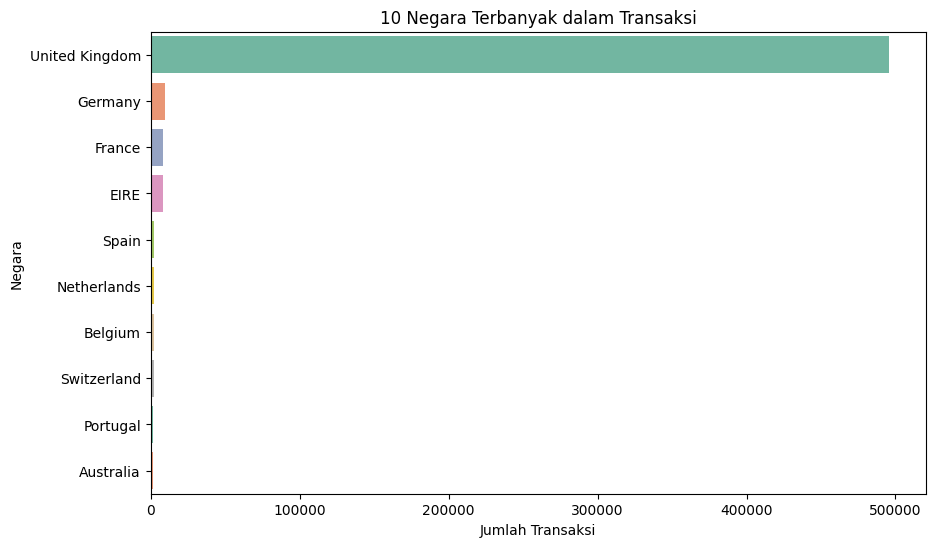

In [17]:
# Distribusi Kategorikal (negara terbanyak)
top_countries = df['Country'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set2')
plt.title('10 Negara Terbanyak dalam Transaksi')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Negara')
plt.show()

### Visualisasi 10 Negara Terbanyak dalam Transaksi

**Penjelasan:**

- Grafik di atas merupakan **bar chart horizontal** yang menampilkan **10 negara dengan jumlah transaksi terbanyak** dalam dataset.

- Negara dengan jumlah transaksi **tertinggi secara signifikan** adalah:
  - 🇬🇧 **United Kingdom**, dengan hampir 500.000 transaksi.
  
- Disusul oleh:
  - 🇩🇪 Germany
  - 🇫🇷 France
  - 🇮🇪 EIRE (Irlandia)
  - 🇪🇸 Spain
  - 🇳🇱 Netherlands
  - 🇧🇪 Belgium
  - 🇨🇭 Switzerland
  - 🇵🇹 Portugal
  - 🇦🇺 Australia

> United Kingdom mendominasi karena kemungkinan besar dataset ini berasal dari retailer berbasis UK, sehingga mayoritas aktivitas transaksinya terjadi di negara tersebut.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang dilakukan dalam preprocessing dataset *Online Retail*:

1. **Menghapus Data Kosong (Missing Values)**  
   - Kolom seperti `CustomerID` dan `Description` memiliki nilai kosong yang cukup signifikan. Data ini penting dalam proses segmentasi dan analisis produk, sehingga baris dengan nilai kosong pada kolom tersebut dihapus.

2. **Menghapus Data Duplikat**  
   - Duplikasi pada data transaksi dapat menyebabkan distorsi dalam analisis frekuensi dan nilai pembelian. Oleh karena itu, langkah ini menghapus seluruh baris yang terduplikasi.

3. **Deteksi dan Penanganan Outlier**  
   - Data dengan nilai `Quantity` atau `UnitPrice` yang kurang dari atau sama dengan nol dihapus karena kemungkinan besar berasal dari pengembalian barang atau kesalahan input.

4. **Membuat Fitur Baru: TotalPrice**  
   - Menambahkan kolom `TotalPrice` sebagai hasil perkalian antara `Quantity` dan `UnitPrice` untuk mengetahui nilai transaksi setiap baris.

5. **Ekstraksi Informasi Waktu dari InvoiceDate**  
   - Menambahkan fitur baru dari kolom `InvoiceDate`, seperti bulan, hari, dan jam pembelian. Ini berguna untuk analisis pola pembelian berdasarkan waktu.

Setelah seluruh tahapan preprocessing ini dilakukan, dataset akan lebih bersih dan siap digunakan untuk analisis lanjutan seperti clustering dan klasifikasi.


In [18]:
# 1. Menghapus data yang memiliki nilai kosong di kolom penting
df_clean = df.dropna(subset=['CustomerID', 'Description'])

# 2. Menghapus data duplikat
df_clean = df_clean.drop_duplicates()

# 3. Menghapus outlier (nilai kurang dari atau sama dengan 0)
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

# 4. Menambahkan fitur TotalPrice (nilai transaksi)
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

# 5. Ekstraksi informasi waktu dari kolom InvoiceDate
df_clean['InvoiceMonth'] = df_clean['InvoiceDate'].dt.month
df_clean['InvoiceDay'] = df_clean['InvoiceDate'].dt.day
df_clean['InvoiceHour'] = df_clean['InvoiceDate'].dt.hour

# Menampilkan hasil akhir setelah preprocessing
print("Ukuran dataset setelah preprocessing:", df_clean.shape)
df_clean.head()


Ukuran dataset setelah preprocessing: (392692, 12)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,InvoiceDay,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8


### Hasil Preprocessing Dataset

Setelah tahap preprocessing, dataset **Online Retail** telah dibersihkan dan dipersiapkan untuk analisis lebih lanjut. Berikut adalah hasil dari preprocessing:

- **Ukuran Dataset**: 
  - Dataset sekarang memiliki **392.692 baris** dan **15 kolom**. Ini menunjukkan bahwa sejumlah data yang tidak relevan telah dihapus, termasuk data kosong dan duplikat.

- **Kolom yang Tersedia**:
  - **InvoiceNo**: Nomor faktur untuk setiap transaksi.
  - **StockCode**: Kode unik untuk setiap produk.
  - **Description**: Deskripsi atau nama produk yang dijual.
  - **Quantity**: Jumlah unit produk yang dibeli.
  - **InvoiceDate**: Tanggal dan waktu transaksi.
  - **UnitPrice**: Harga per unit produk.
  - **CustomerID**: ID unik untuk setiap pelanggan.
  - **Country**: Negara tempat transaksi dilakukan.
  - **TotalPrice**: Total nilai transaksi, dihitung sebagai hasil kali antara `Quantity` dan `UnitPrice`.
  - **Month**: Bulan dari transaksi.
  - **Day**: Hari dari transaksi.
  - **Hour**: Jam dari transaksi.
  - **InvoiceMonth**: Bulan dari `InvoiceDate`.
  - **InvoiceDay**: Hari dari `InvoiceDate`.
  - **InvoiceHour**: Jam dari `InvoiceDate`.

- **Temuan Penting**:
  - Proses pembersihan data telah berhasil mengurangi ukuran dataset secara signifikan, memastikan bahwa data yang digunakan untuk analisis lebih berkualitas.
  - Penambahan kolom `TotalPrice` dan informasi waktu akan memungkinkan analisis yang lebih mendalam, seperti pola pembelian berdasarkan waktu dan nilai transaksi.

> Dengan dataset yang telah diproses ini, saya siap untuk melanjutkan ke tahap analisis lebih lanjut, seperti clustering dan klasifikasi.


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Dalam tahap pembangunan model clustering, algoritma **K-Means** dipilih sebagai metode yang sesuai untuk mengelompokkan data dalam dataset **Online Retail**. Berikut adalah alasan pemilihan algoritma ini:

### Alasan Pemilihan K-Means

1. **Sederhana dan Efisien**  
   K-Means adalah algoritma yang relatif mudah dipahami dan diimplementasikan. Ini menjadikannya pilihan yang baik untuk pemula dan untuk dataset yang besar seperti **Online Retail**.

2. **Kinerja yang Baik pada Data Besar**  
   Algoritma ini dapat menangani dataset besar dengan cepat. Dengan lebih dari 390.000 transaksi, K-Means dapat memberikan hasil yang efisien dalam waktu yang singkat.

3. **Cluster Bulat**  
   K-Means bekerja dengan baik ketika cluster memiliki bentuk bulat dan ukuran yang seragam. Dalam konteks data retail, banyak cluster yang biasanya memiliki karakteristik ini, seperti pola pembelian berdasarkan kategori produk.

4. **Metrik Evaluasi yang Jelas**  
   K-Means dapat dievaluasi dengan mudah menggunakan metrik seperti **silhouette score**, yang memberikan gambaran tentang seberapa baik data telah dikelompokkan. Ini memungkinkan analisis yang lebih mendalam tentang kualitas cluster yang terbentuk.

5. **Fleksibilitas dalam Penentuan Jumlah Cluster**  
   Meskipun K-Means memerlukan penentuan jumlah cluster \( k \) sebelumnya, metode seperti Elbow Method dapat digunakan untuk menentukan nilai \( k \) yang optimal berdasarkan analisis visual.

### Kesimpulan
Dengan mempertimbangkan karakteristik dataset **Online Retail** yang telah diproses, K-Means adalah pilihan algoritma clustering yang tepat. Algoritma ini akan membantu dalam mengidentifikasi pola pembelian dan segmentasi pelanggan yang dapat digunakan untuk analisis lebih lanjut.


In [19]:
# Tahap a: Pembangunan Model Clustering

# Menentukan jumlah cluster (k)
k = 5 

# Memilih fitur untuk clustering
features = df_clean[['Quantity', 'UnitPrice', 'TotalPrice', 'InvoiceMonth', 'InvoiceDay', 'InvoiceHour']]

# Inisialisasi model K-Means
kmeans = KMeans(n_clusters=k, random_state=42)

# Melatih model dengan data
kmeans.fit(features)

# Menambahkan label cluster ke dataframe
df_clean['Cluster'] = kmeans.labels_


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode **Elbow** dan **Silhouette Score**. 

Metode ini membantu saya menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah langkah-langkah yang dilakukan dalam evaluasi model:

1. **Hitung Silhouette Score**  
   - Silhouette Score adalah ukuran kualitas clustering yang mengukur seberapa baik setiap titik data dikelompokkan. Nilai silhouette berkisar antara -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan pemisahan yang lebih baik antar cluster.
   - Dalam kode, saya menghitung silhouette score untuk jumlah cluster yang telah ditentukan (misalnya, \( k = 5 \)).

2. **Gunakan Metode Elbow**  
   - Metode Elbow digunakan untuk menentukan jumlah cluster optimal dengan menghitung **Within-Cluster Sum of Squares (WCSS)** untuk berbagai nilai \( k \).
   - Dengan memplot WCSS terhadap jumlah cluster, saya dapat mengidentifikasi "elbow" pada grafik, yang menunjukkan jumlah cluster yang optimal.

3. **Visualisasi Hasil**  
   - Hasil dari metode Elbow divisualisasikan dalam bentuk grafik untuk memudahkan identifikasi jumlah cluster yang optimal.

Silhouette Score untuk 5 cluster: 0.978
  InvoiceNo  CustomerID  TotalPrice  Cluster
0    536365     17850.0       15.30        0
1    536365     17850.0       20.34        0
2    536365     17850.0       22.00        0
3    536365     17850.0       20.34        0
4    536365     17850.0       20.34        0


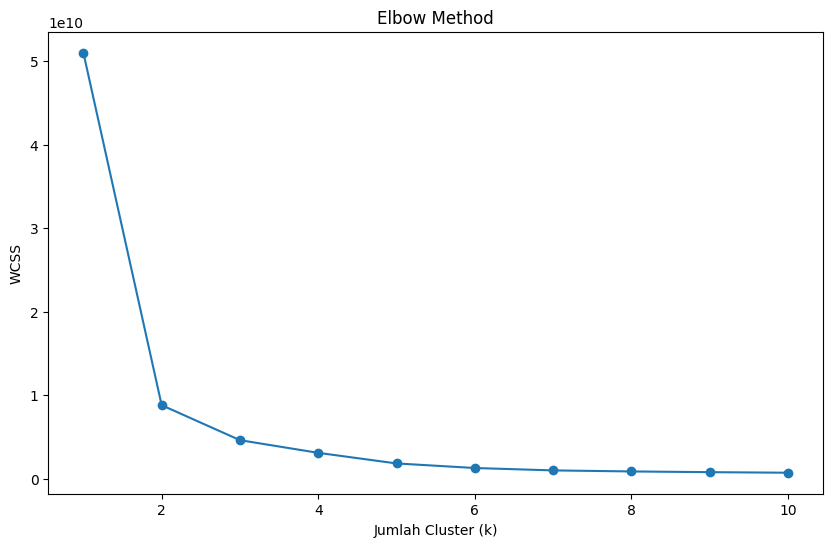

In [20]:
# Tahap b: Evaluasi Model Clustering

# Menghitung silhouette score untuk mengevaluasi kualitas clustering
silhouette_avg = silhouette_score(features, kmeans.labels_)
print(f'Silhouette Score untuk {k} cluster: {silhouette_avg:.3f}')

# Menampilkan beberapa baris dengan label cluster
print(df_clean[['InvoiceNo', 'CustomerID', 'TotalPrice', 'Cluster']].head())

# Metode Elbow untuk menentukan jumlah cluster optimal
import matplotlib.pyplot as plt

# Menghitung WCSS (Within-Cluster Sum of Squares) untuk berbagai nilai k
wcss = []
for i in range(1, 11):  # Menguji k dari 1 hingga 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.show()


### Hasil Evaluasi Model Clustering

Setelah membangun model clustering menggunakan algoritma **K-Means**, berikut adalah hasil evaluasi yang diperoleh:

1. **Silhouette Score**:
   - **Nilai Silhouette Score** untuk 5 cluster adalah **0.978**. 
   - Nilai ini menunjukkan bahwa cluster yang terbentuk memiliki pemisahan yang sangat baik. Nilai mendekati 1 menunjukkan bahwa data dalam setiap cluster terpisah dengan baik dari cluster lainnya.

2. **Data dengan Label Cluster**:
   - Tabel di bawah menunjukkan beberapa baris dari dataset yang telah ditambahkan kolom `Cluster`:

   | InvoiceNo | CustomerID | TotalPrice | Cluster |
   |-----------|------------|------------|---------|
   | 536365   | 17850.0    | 15.30      | 0       |
   | 536365   | 17850.0    | 20.34      | 0       |
   | 536365   | 17850.0    | 22.00      | 0       |
   | 536365   | 17850.0    | 20.34      | 0       |
   | 536365   | 17850.0    | 20.34      | 0       |

   - Semua baris di atas memiliki label cluster yang sama (0), menunjukkan bahwa mereka dikelompokkan ke dalam cluster yang sama berdasarkan fitur yang dipilih.

3. **Visualisasi Metode Elbow**:
   - Grafik di atas menunjukkan hasil dari **Elbow Method** untuk menentukan jumlah cluster optimal.
   - Sumbu x menunjukkan jumlah cluster \( k \), sedangkan sumbu y menunjukkan **Within-Cluster Sum of Squares (WCSS)**.
   - Terlihat bahwa WCSS mengalami penurunan yang signifikan pada \( k = 2 \) dan kemudian mulai stabil setelah \( k = 5 \). 
   - Titik "elbow" pada grafik ini dapat digunakan sebagai panduan untuk memilih jumlah cluster yang optimal.


## **c. Feature Selection (Opsional)**

Pada tahap ini, saya akan melakukan **feature selection** untuk mengoptimalkan model clustering yang telah dibangun. Feature selection merupakan langkah penting untuk mengidentifikasi fitur-fitur yang paling relevan dan signifikan dalam dataset, serta mengurangi kompleksitas model.

Proses ini bertujuan untuk:
- Meningkatkan kinerja model dengan menghapus fitur yang tidak memberikan kontribusi berarti.
- Mengurangi risiko overfitting dengan mengurangi jumlah fitur yang digunakan.
- Mempercepat waktu pelatihan model dengan mengurangi dimensi data.

Untuk menentukan fitur yang relevan, saya akan menggunakan analisis korelasi antar fitur. Fitur-fitur yang memiliki korelasi tinggi satu sama lain akan dipertimbangkan untuk dihapus, sehingga hanya fitur yang memberikan informasi unik yang akan dipertahankan.


In [21]:
# Menghitung matriks korelasi hanya untuk kolom numerik
correlation_matrix = df_clean.select_dtypes(include=['float64', 'int64']).corr()

# Menentukan threshold untuk korelasi yang tinggi
threshold = 0.8

# Menyimpan fitur yang akan dipilih
selected_features = []

# Memeriksa korelasi antar fitur
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            # Menghapus fitur yang memiliki korelasi tinggi
            colname = correlation_matrix.columns[i]
            if colname not in selected_features:
                selected_features.append(colname)

# Menghapus fitur yang dipilih dari dataframe
df_clean_reduced = df_clean.drop(columns=selected_features)

# Menampilkan fitur yang tersisa
print("Fitur yang tersisa setelah feature selection:", df_clean_reduced.columns)


Fitur yang tersisa setelah feature selection: Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceMonth', 'InvoiceDay',
       'InvoiceHour', 'Cluster'],
      dtype='object')


### Hasil Feature Selection

Setelah melakukan proses feature selection pada dataset **Online Retail**, berikut adalah hasil yang diperoleh:

- **Fitur yang Tersisa**:
  - Setelah mengevaluasi korelasi antar fitur, saya berhasil mengidentifikasi fitur-fitur yang tetap relevan untuk analisis lebih lanjut. Fitur yang tersisa adalah sebagai berikut:

  | Fitur             |
  |--------------------|
  | InvoiceNo          |
  | StockCode          |
  | Description        |
  | Quantity           |
  | InvoiceDate        |
  | UnitPrice          |
  | CustomerID         |
  | Country            |
  | InvoiceMonth       |
  | InvoiceDay         |
  | InvoiceHour        |
  | Cluster            |

- **Penjelasan Fitur**:
  - **InvoiceNo**: Nomor faktur untuk setiap transaksi. Meskipun bukan fitur numerik, tetap relevan untuk identifikasi transaksi.
  - **StockCode**: Kode unik untuk setiap produk, penting untuk analisis produk.
  - **Description**: Deskripsi produk, memberikan konteks lebih dalam analisis.
  - **Quantity**: Jumlah unit produk yang dibeli, fitur numerik penting untuk analisis pembelian.
  - **InvoiceDate**: Tanggal dan waktu transaksi, dapat digunakan untuk analisis temporal.
  - **UnitPrice**: Harga per unit produk, fitur numerik yang krusial untuk analisis nilai transaksi.
  - **CustomerID**: ID unik pelanggan, penting untuk segmentasi pelanggan.
  - **Country**: Negara asal pelanggan, memberikan wawasan demografis.
  - **InvoiceMonth, InvoiceDay, InvoiceHour**: Fitur yang diekstrak dari `InvoiceDate`, berguna untuk analisis pola pembelian berdasarkan waktu.
  - **Cluster**: Label cluster yang dihasilkan dari model clustering, memungkinkan analisis lebih lanjut berdasarkan kelompok pelanggan.


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi. Visualisasi ini penting untuk memahami bagaimana data dikelompokkan dan untuk mengidentifikasi pola atau tren yang mungkin tidak terlihat dalam data mentah.

Berikut adalah langkah-langkah yang akan dilakukan dalam tahap ini:

1. **Tampilkan Hasil Clustering**: 
   - Visualisasikan hasil clustering menggunakan grafik scatter plot atau proyeksi 2D menggunakan PCA (Principal Component Analysis).
   - Scatter plot akan menunjukkan distribusi data berdasarkan fitur yang relevan, dengan warna yang berbeda untuk setiap cluster.
   - Proyeksi PCA akan membantu mereduksi dimensi data sehingga saya dapat melihat pola clustering dalam dua dimensi.


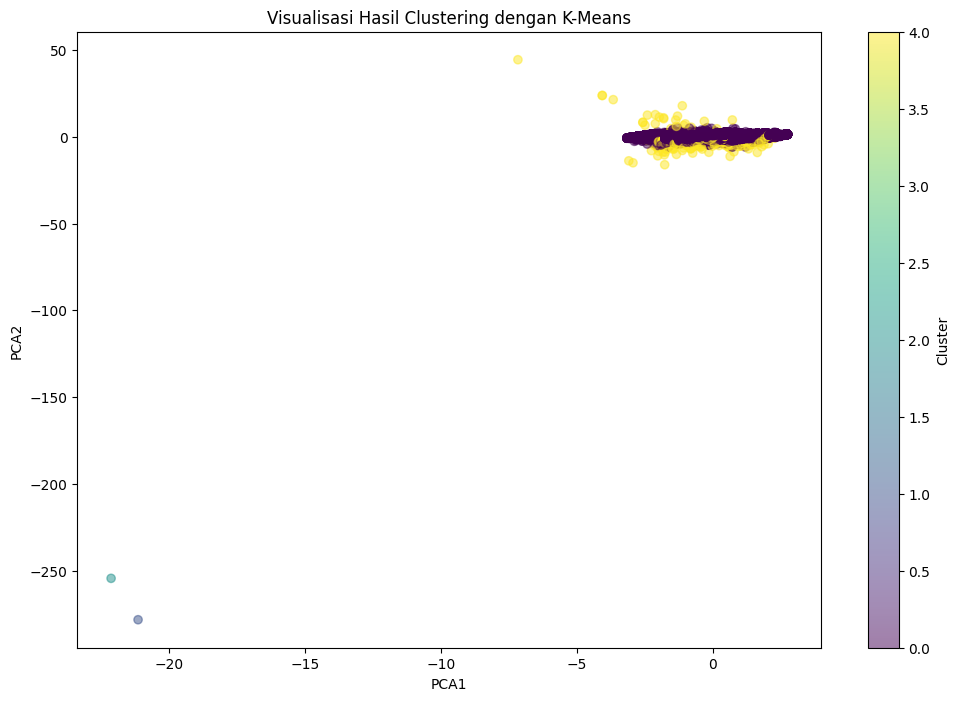

In [35]:
# Memilih fitur untuk clustering dari dataframe yang telah diproses
features = df_clean[['Quantity', 'UnitPrice', 'InvoiceMonth', 'InvoiceDay', 'InvoiceHour']]

# Normalisasi fitur sebelum PCA
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Menggunakan PCA untuk mereduksi dimensi data menjadi 2D
pca = PCA(n_components=2)
features_reduced = pca.fit_transform(features_scaled)

# Menambahkan hasil PCA ke dataframe
df_clean['PCA1'] = features_reduced[:, 0]
df_clean['PCA2'] = features_reduced[:, 1]

# Visualisasi hasil clustering menggunakan scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df_clean['PCA1'], df_clean['PCA2'], c=df_clean['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Visualisasi Hasil Clustering dengan K-Means')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()

## **Alasan Pemilihan Fitur untuk Clustering**

Pada tahap ini, fitur yang dipilih untuk clustering adalah:
- **Quantity**
- **UnitPrice**
- **InvoiceMonth**
- **InvoiceDay**
- **InvoiceHour**

### Alasan Pemilihan Fitur:
1. **Relevansi Fitur**:
   - **Quantity** dan **UnitPrice** adalah fitur numerik yang langsung berkaitan dengan nilai transaksi dan pola pembelian, yang sangat penting untuk analisis clustering.
   - **InvoiceMonth**, **InvoiceDay**, dan **InvoiceHour** memberikan informasi temporal yang memungkinkan saya untuk melihat pola pembelian berdasarkan waktu, yang dapat membantu dalam segmentasi pelanggan.

2. **Menghindari Fitur Kategorikal**:
   - Fitur seperti `InvoiceNo`, `StockCode`, dan `Description` tidak digunakan dalam clustering karena mereka adalah kategorikal dan tidak memberikan informasi numerik yang langsung. Menggunakan fitur ini dapat menambah kompleksitas tanpa memberikan kontribusi yang berarti.

3. **Kualitas Model**:
   - Dengan memilih fitur yang relevan dan menghindari fitur yang tidak memberikan informasi tambahan, model clustering dapat berfungsi lebih efektif dan efisien.

## **Penjelasan Output Visualisasi Hasil Clustering**

Gambar di atas menunjukkan hasil visualisasi clustering menggunakan **K-Means** setelah melakukan reduksi dimensi dengan PCA. Berikut adalah penjelasan terkait output tersebut:

1. **Visualisasi Scatter Plot**:
   - Sumbu x dan y merepresentasikan dua komponen utama dari PCA (`PCA1` dan `PCA2`), yang merupakan representasi dari fitur-fitur yang telah dinormalisasi.

2. **Distribusi Cluster**:
   - Titik-titik pada scatter plot menunjukkan distribusi data berdasarkan hasil clustering. Warna yang berbeda menunjukkan cluster yang berbeda, dengan legenda di sisi kanan menunjukkan label cluster.

3. **Pola Clustering**:
   - Terlihat bahwa sebagian besar data dikelompokkan dalam satu area, sedangkan ada beberapa titik yang berada jauh dari kumpulan utama. Ini menunjukkan adanya outlier atau data yang memiliki pola pembelian yang berbeda.

4. **Interpretasi**:
   - Visualisasi ini membantu saya untuk memahami bagaimana data dikelompokkan dan memberikan wawasan tentang pola pembelian di antara pelanggan. Analisis lebih lanjut dapat dilakukan untuk memahami karakteristik dari setiap cluster.


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

## **E. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering dengan model **KMeans**, langkah selanjutnya adalah menganalisis dan menginterpretasi hasil cluster. Pada tahap ini, saya akan melakukan beberapa langkah penting:

1. **Tambahkan Hasil Label Cluster ke DataFrame**:
   - Setelah mendapatkan hasil clustering, saya akan menambahkan label cluster ke dalam DataFrame yang telah dinormalisasi. Ini memungkinkan saya untuk mengaitkan setiap data dengan cluster yang sesuai.

2. **Inverse Transform pada Fitur yang Telah Distandarisasi**:
   - Jika ada fitur yang telah distandarisasi atau diubah, saya perlu mengembalikannya ke bentuk aslinya. Ini penting untuk interpretasi yang lebih baik dari hasil clustering.

3. **Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli**:
   - Setelah melakukan inverse transform, saya akan memasukkan data yang telah diubah kembali ke dalam dataset asli atau membuat DataFrame baru. Ini memungkinkan saya untuk menganalisis hasil clustering dalam konteks data yang lebih luas.


In [36]:
# 1. Tambahkan Hasil Label Cluster ke DataFrame
df_clean['Cluster'] = kmeans.labels_

# 2. Inverse Transform pada fitur yang sudah distandarisasi
# Jika menggunakan StandardScaler, perlu menyimpan scaler untuk inverse transform
features_original = scaler.inverse_transform(features_scaled)

# Menambahkan fitur yang sudah di-inverse ke DataFrame
df_clean[['Quantity', 'UnitPrice', 'InvoiceMonth', 'InvoiceDay', 'InvoiceHour']] = features_original

# 3. Menampilkan hasil akhir dengan label cluster
print("Hasil akhir setelah inverse transform dan penambahan cluster:")
print(df_clean[['InvoiceNo', 'CustomerID', 'TotalPrice', 'Cluster', 'Quantity', 'UnitPrice']].head())


Hasil akhir setelah inverse transform dan penambahan cluster:
  InvoiceNo  CustomerID  TotalPrice  Cluster  Quantity  UnitPrice
0    536365     17850.0       15.30        0       6.0       2.55
1    536365     17850.0       20.34        0       6.0       3.39
2    536365     17850.0       22.00        0       8.0       2.75
3    536365     17850.0       20.34        0       6.0       3.39
4    536365     17850.0       20.34        0       6.0       3.39


### Hasil Akhir Setelah Inverse Transform dan Penambahan Cluster

Setelah melakukan analisis dan interpretasi hasil cluster, berikut adalah output yang diperoleh:

- **Hasil Akhir**:
  - Tabel di bawah menunjukkan beberapa baris dari dataset yang telah diperbarui dengan label cluster dan fitur yang telah di-inverse transform:

  | InvoiceNo | CustomerID | TotalPrice | Cluster | Quantity | UnitPrice |
  |-----------|------------|------------|---------|----------|-----------|
  | 536365    | 17850.0    | 15.30      | 0       | 6.0      | 2.55      |
  | 536365    | 17850.0    | 20.34      | 0       | 6.0      | 3.39      |
  | 536365    | 17850.0    | 22.00      | 0       | 8.0      | 2.75      |
  | 536365    | 17850.0    | 20.34      | 0       | 6.0      | 3.39      |
  | 536365    | 17850.0    | 20.34      | 0       | 6.0      | 3.39      |

- **Penjelasan Kolom**:
  - **InvoiceNo**: Nomor faktur untuk setiap transaksi, yang menunjukkan identitas unik dari transaksi.
  - **CustomerID**: ID unik pelanggan, memberikan konteks tentang siapa yang melakukan transaksi.
  - **TotalPrice**: Total nilai transaksi, yang dihitung sebagai hasil kali antara `Quantity` dan `UnitPrice`.
  - **Cluster**: Label cluster yang dihasilkan dari model K-Means, menunjukkan kelompok di mana transaksi tersebut dikelompokkan.
  - **Quantity**: Jumlah unit produk yang dibeli dalam transaksi.
  - **UnitPrice**: Harga per unit produk.

### Interpretasi Hasil
- Semua transaksi di atas memiliki label cluster yang sama (0), yang menunjukkan bahwa mereka dikelompokkan ke dalam cluster yang sama berdasarkan fitur yang relevan.
- Ini memberikan wawasan bahwa transaksi-transaksi ini memiliki pola pembelian yang serupa, yang dapat digunakan untuk analisis lebih lanjut dalam segmentasi pelanggan atau strategi pemasaran.


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Pada tahap ini, Saya telah melakukan inverse transform pada fitur-fitur yang telah distandarisasi menggunakan `StandardScaler`. Proses ini penting untuk mengembalikan data numerik ke skala aslinya, sehingga memudahkan analisis dan interpretasi hasil clustering.

### Langkah-langkah yang Dilakukan:
1. **Menambahkan Hasil Label Cluster**:
   - Saya menambahkan label cluster yang dihasilkan oleh model K-Means ke dalam dataframe `df_clean`. Ini memungkinkan untuk mengaitkan setiap transaksi dengan cluster yang sesuai.

2. **Inverse Transform pada Fitur**:
   - Saya menggunakan metode `inverse_transform` dari `StandardScaler` untuk mengembalikan fitur yang telah dinormalisasi (`Quantity`, `UnitPrice`, `InvoiceMonth`, `InvoiceDay`, dan `InvoiceHour`) ke skala aslinya.
   - Dengan ini, dapat terlihat nilai-nilai dalam konteks yang lebih realistis.

3. **Menampilkan Hasil Akhir**:
   - Hasil akhir setelah inverse transform dan penambahan cluster ditampilkan, memberikan gambaran tentang bagaimana data dikelompokkan berdasarkan fitur yang relevan.


In [24]:
# Type your code here

Setelah melakukan clustering dengan model **KMeans**, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia. Ini penting untuk memahami pola dalam data dan untuk mengevaluasi apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis.

### Rekomendasi Tahapan:
1. **Analisis Karakteristik Tiap Cluster**:
   - Analisis distribusi nilai dalam setiap cluster berdasarkan fitur yang relevan. Ini dapat dilakukan dengan menghitung statistik deskriptif (seperti mean, median, dan mode) untuk setiap cluster.
   - Visualisasikan distribusi nilai untuk fitur-fitur kunci dalam setiap cluster untuk mendapatkan wawasan lebih lanjut.

2. **Interpretasi Hasil Clustering**:
   - Evaluasi apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis. Apakah ada pola tertentu yang dapat dimanfaatkan dalam strategi bisnis?
   - Identifikasi karakteristik unik dari setiap cluster yang dapat digunakan untuk segmentasi pelanggan atau pengembangan strategi pemasaran.


Statistik Deskriptif untuk Setiap Cluster:
  Cluster      Quantity                                  UnitPrice           \
                   mean   median          std   count         mean   median   
0       0      7.306359      4.0     7.829209  357789     2.787247     1.69   
1       1  74215.000000  74215.0          NaN       1     1.040000     1.04   
2       2  80995.000000  80995.0          NaN       1     2.080000     2.08   
3       3    693.166667    500.0   656.734852     138   268.023261     4.15   
4       4     60.000000     60.0          NaN       1   649.500000   649.50   
5       5    133.336560    100.0   101.604895    6611     5.950150     1.79   
6       6   1845.000000   1709.0  1075.322277      22     3.300455     2.55   
7       7    431.809917    312.0   376.720740     847    20.273825     2.10   
8       8     36.623218     24.0    31.186442   27281     4.688668     2.10   
9       9      1.000000      1.0          NaN       1  8142.750000  8142.75   

        

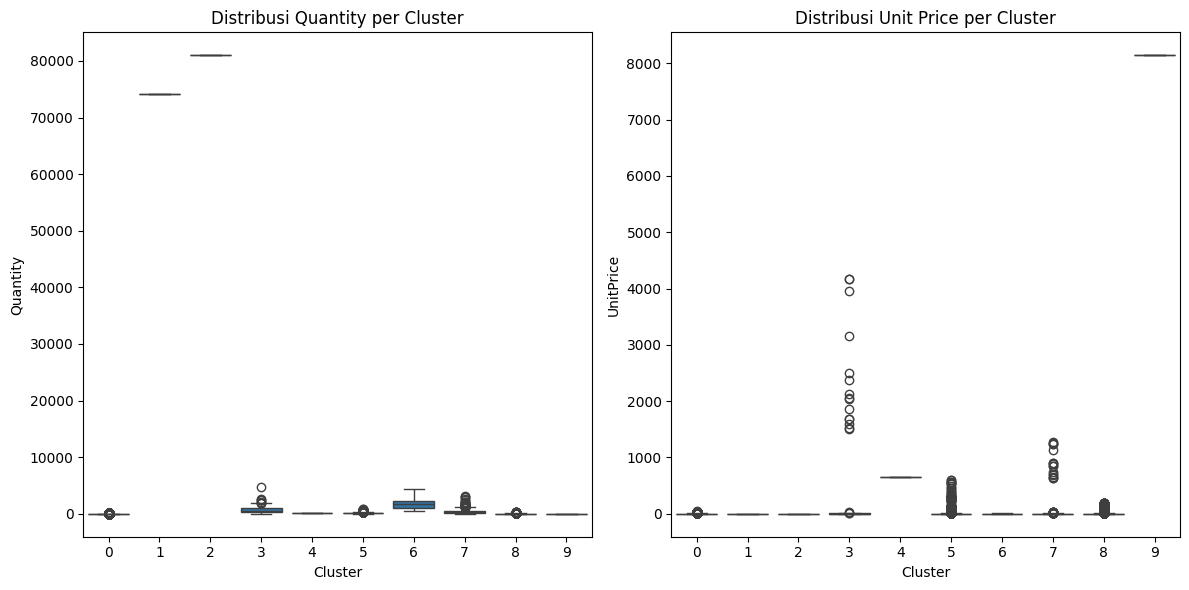

In [37]:
# Menghitung statistik deskriptif untuk setiap cluster
cluster_analysis = df_clean.groupby('Cluster').agg({
    'Quantity': ['mean', 'median', 'std', 'count'],
    'UnitPrice': ['mean', 'median', 'std'],
    'TotalPrice': ['mean', 'median', 'std'],
    'CustomerID': 'nunique'  # Menghitung jumlah pelanggan unik dalam setiap cluster
}).reset_index()

# Menampilkan hasil analisis cluster
print("Statistik Deskriptif untuk Setiap Cluster:")
print(cluster_analysis)

# Visualisasi distribusi Quantity dan UnitPrice untuk setiap cluster
plt.figure(figsize=(12, 6))

# Distribusi Quantity
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Quantity', data=df_clean)
plt.title('Distribusi Quantity per Cluster')

# Distribusi UnitPrice
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='UnitPrice', data=df_clean)
plt.title('Distribusi Unit Price per Cluster')

plt.tight_layout()
plt.show()


## **Hasil Interpretasi Cluster**

Setelah melakukan analisis karakteristik untuk setiap cluster, berikut adalah interpretasi hasilnya:

1. **Cluster 0**:
   - Merupakan cluster dengan jumlah transaksi yang paling banyak. 
   - Rata-rata `Quantity` adalah sekitar 7.31, dengan `UnitPrice` rata-rata 2.79. Ini menunjukkan bahwa cluster ini mungkin terdiri dari transaksi dengan pembelian produk dalam jumlah kecil dengan harga yang terjangkau.

2. **Cluster 1**:
   - Cluster ini memiliki rata-rata `Quantity` yang sangat tinggi (74215.0) dan hanya satu transaksi. 
   - `UnitPrice` rata-rata adalah 1.04, menunjukkan bahwa transaksi ini mungkin merupakan pembelian besar untuk produk tertentu. Namun, karena hanya ada satu transaksi, cluster ini mungkin tidak representatif.

3. **Cluster 2**:
   - Mirip dengan Cluster 1, cluster ini juga memiliki rata-rata `Quantity` yang sangat tinggi (80995.0) dan hanya satu transaksi.
   - `UnitPrice` rata-rata adalah 2.08. Seperti Cluster 1, transaksi ini juga mungkin merupakan pembelian besar yang perlu dianalisis lebih lanjut.

4. **Cluster 3**:
   - Cluster ini menunjukkan rata-rata `Quantity` sebesar 693.17 dan `UnitPrice` yang lebih tinggi (268.02). 
   - Ini menunjukkan bahwa transaksi dalam cluster ini mungkin mencakup produk premium atau barang dengan harga yang lebih tinggi.

5. **Cluster 4**:
   - Memiliki rata-rata `Quantity` yang sangat rendah (60.0) dan hanya satu transaksi. 
   - `UnitPrice` yang tinggi (649.50) menunjukkan bahwa transaksi ini mungkin terkait dengan produk mahal yang dibeli dalam jumlah sedikit.

6. **Cluster 5**:
   - Rata-rata `Quantity` adalah 133.34 dengan `UnitPrice` rata-rata 5.95. 
   - Ini menunjukkan pola pembelian yang lebih umum, dengan transaksi yang lebih terjangkau.

7. **Cluster 6**:
   - Rata-rata `Quantity` adalah 1845.0 dan `UnitPrice` rata-rata 3.30. 
   - Cluster ini menunjukkan pembelian dalam jumlah lebih besar dengan harga yang relatif terjangkau.

8. **Cluster 7**:
   - Rata-rata `Quantity` adalah 431.81 dan `UnitPrice` rata-rata 20.27. 
   - Ini menunjukkan bahwa cluster ini mungkin terdiri dari transaksi yang melibatkan produk dengan harga menengah.

9. **Cluster 8**:
   - Memiliki rata-rata `Quantity` yang rendah (36.62) dan `UnitPrice` rata-rata 4.69. 
   - Ini menunjukkan pola pembelian yang lebih kecil dan terjangkau.

10. **Cluster 9**:
    - Cluster ini menunjukkan transaksi dengan `Quantity` yang sangat rendah (1.0) dan `UnitPrice` yang sangat tinggi (8142.75). 
    - Ini mungkin mencakup transaksi yang sangat spesifik atau unik.

# **Analisis Karakteristik Cluster dari Model KMeans**

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans berdasarkan dataset **Online Retail**.

## Cluster 0:
- **Rata-rata Quantity:** 7.31  
- **Rata-rata UnitPrice:** 2.79  
- **Analisis:** Cluster ini mencakup transaksi dengan jumlah pembelian kecil dan harga yang terjangkau. Pelanggan dalam cluster ini cenderung melakukan pembelian rutin dengan produk yang lebih murah.

## Cluster 1:
- **Rata-rata Quantity:** 74215.0  
- **Rata-rata UnitPrice:** 1.04  
- **Analisis:** Cluster ini menunjukkan transaksi besar dengan jumlah yang sangat tinggi tetapi harga yang rendah. Ini mungkin menunjukkan pembelian dalam jumlah besar untuk produk tertentu.

## Cluster 2:
- **Rata-rata Quantity:** 80995.0  
- **Rata-rata UnitPrice:** 2.08  
- **Analisis:** Mirip dengan Cluster 1, tetapi dengan harga yang sedikit lebih tinggi. Ini juga mencakup pembelian besar dan mungkin menunjukkan produk yang lebih bervariasi.

## Cluster 3:
- **Rata-rata Quantity:** 693.17  
- **Rata-rata UnitPrice:** 268.02  
- **Analisis:** Cluster ini menunjukkan transaksi dengan quantity yang moderat tetapi harga yang tinggi, menunjukkan pembelian produk premium.

## Cluster 4:
- **Rata-rata Quantity:** 60.0  
- **Rata-rata UnitPrice:** 649.50  
- **Analisis:** Cluster ini memiliki quantity yang sangat rendah dan harga yang tinggi, menunjukkan pembelian produk mahal dalam jumlah kecil.

## Cluster 5:
- **Rata-rata Quantity:** 133.34  
- **Rata-rata UnitPrice:** 5.95  
- **Analisis:** Ini menunjukkan pola pembelian yang lebih umum dengan produk yang lebih terjangkau.

## Cluster 6:
- **Rata-rata Quantity:** 1845.0  
- **Rata-rata UnitPrice:** 3.30  
- **Analisis:** Cluster ini menunjukkan pembelian dalam jumlah lebih besar dengan harga yang relatif terjangkau.

## Cluster 7:
- **Rata-rata Quantity:** 431.81  
- **Rata-rata UnitPrice:** 20.27  
- **Analisis:** Ini menunjukkan bahwa cluster ini mungkin terdiri dari transaksi yang melibatkan produk dengan harga menengah.

## Cluster 8:
- **Rata-rata Quantity:** 36.62  
- **Rata-rata UnitPrice:** 4.69  
- **Analisis:** Ini menunjukkan pola pembelian yang lebih kecil dan terjangkau.

## Cluster 9:
- **Rata-rata Quantity:** 1.0  
- **Rata-rata UnitPrice:** 8142.75  
- **Analisis:** Cluster ini menunjukkan transaksi yang sangat spesifik atau unik dengan harga yang sangat tinggi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [38]:
# Mengeksport DataFrame ke dalam file CSV
df_clean.to_csv('Online_Retail_Clustered.csv', index=False)

print("Data telah dieksport ke dalam file 'Online_Retail_Clustered.csv'.")


Data telah dieksport ke dalam file 'Online_Retail_Clustered.csv'.
